# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import PIL
import tensorflow as tf
import keras
import sklearn

installed_versions = {
    'numpy': np.__version__,
    'pandas': pd.__version__,
    'seaborn': sns.__version__,
    'matplotlib': matplotlib.__version__,
    'PIL': PIL.__version__,
    'tensorflow': tf.__version__,
    'keras': keras.__version__,
    'sklearn': sklearn.__version__,
}
for lib, version in installed_versions.items():
    print(f"{lib}: {version}")

numpy: 2.0.2
pandas: 2.2.2
seaborn: 0.13.2
matplotlib: 3.10.0
PIL: 11.1.0
tensorflow: 2.18.0
keras: 3.8.0
sklearn: 1.6.1


Load the dataset.

In [ ]:
import zipfile
import os

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/Colab Notebooks/data.zip'

# Destination folder
extract_to = '/content/dataset'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped to:", extract_to)

Dataset unzipped to: /content/dataset


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder_path, image_size=(128, 128)):
    X = []
    y = []
    class_labels = os.listdir(folder_path)
    class_labels.sort()

    for idx, class_label in enumerate(class_labels):
        class_folder = os.path.join(folder_path, class_label)
        if not os.path.isdir(class_folder):
            continue
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img = img.resize(image_size)
                    X.append(np.array(img))
                    y.append(idx)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(X), np.array(y), class_labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Total images loaded: 7625
Total labels loaded: 7625
Shape of X: (7625, 128, 128, 3)
Shape of y: (7625,)
Classes found: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


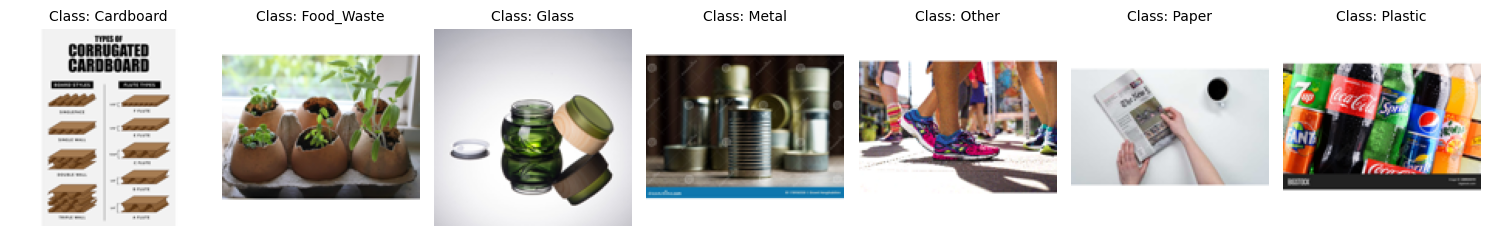

In [ ]:
# Get the images and their labels
# Define your dataset path (where the ZIP file was extracted)
dataset_path = '/content/dataset/data'

# Load images and labels
X, y, class_labels = load_images_from_folder(dataset_path)

# Check shape of loaded data
print("Total images loaded:", len(X))
print("Total labels loaded:", len(y))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Classes found:", class_labels)

# Check sample image and label
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary to hold one sample image per class
sample_images = {}
for img, label in zip(X, y):
    class_name = class_labels[label]
    if class_name not in sample_images:
        sample_images[class_name] = img
    if len(sample_images) == len(class_labels):
        break

# Plot each sample image with its class label
plt.figure(figsize=(15, 6))
for idx, class_name in enumerate(class_labels):
    plt.subplot(1, len(class_labels), idx + 1)
    plt.imshow(sample_images[class_name])
    plt.title(f"Class: {class_name}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()



Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

Class Counts:
Cardboard: 540
Food_Waste: 1000
Glass: 750
Metal: 1000
Other: 1010
Paper: 1030
Plastic: 2295


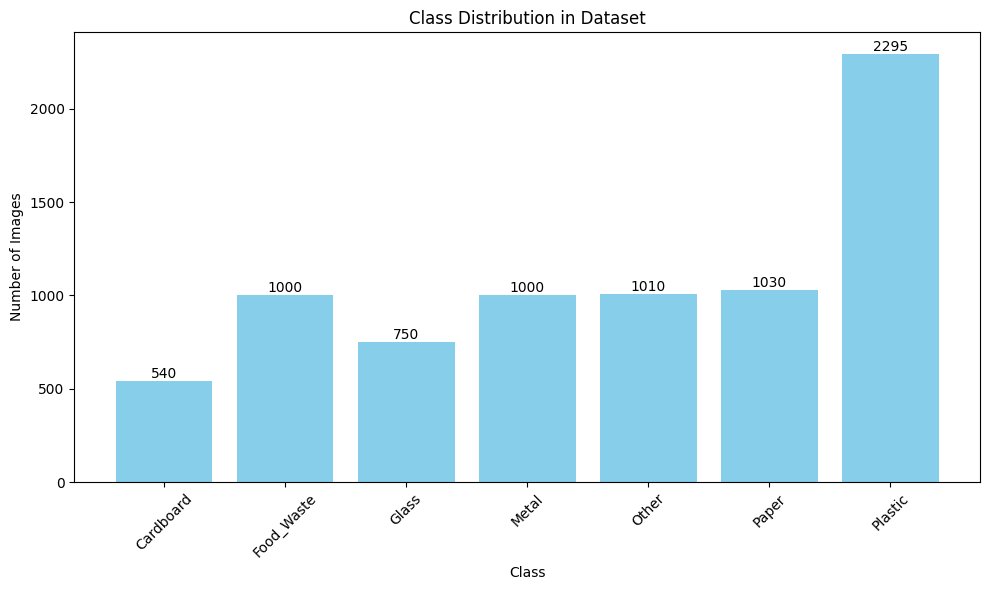

In [ ]:
# Visualise Data Distribution

import matplotlib.pyplot as plt
from collections import Counter

# Count the number of images per class
label_counts = Counter(y)

# Print class counts
print("Class Counts:")
for label_idx, count in label_counts.items():
    print(f"{class_labels[label_idx]}: {count}")

# Map numeric labels to class names
class_names = [class_labels[label] for label in label_counts.keys()]
counts = list(label_counts.values())

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

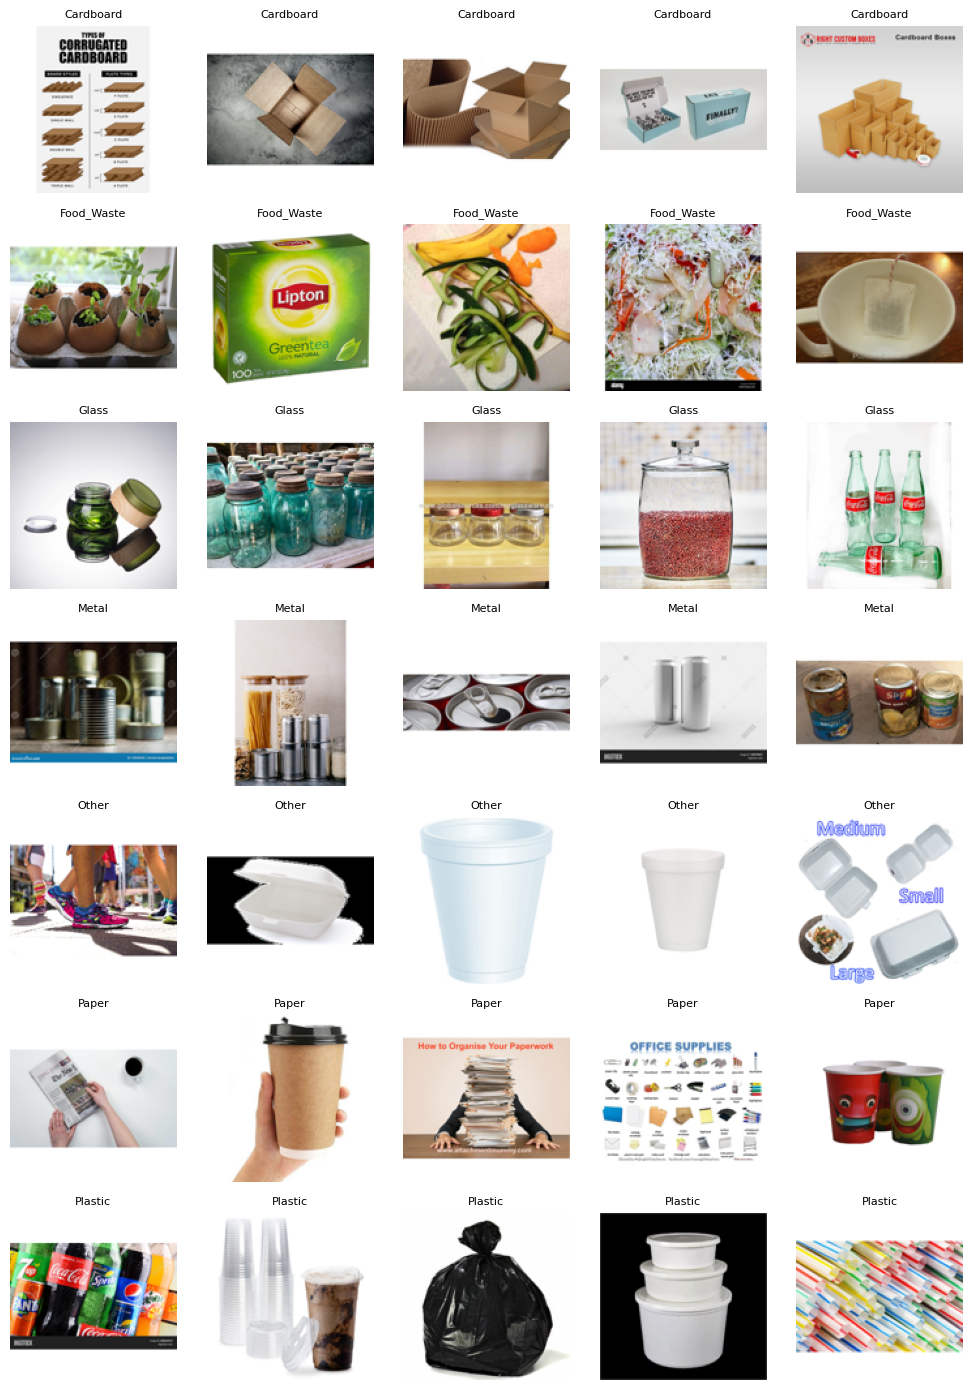

In [ ]:
# Visualise Sample Images (across different labels)

import matplotlib.pyplot as plt
import numpy as np

# Number of samples to show per class
samples_per_class = 5

# Create a figure
plt.figure(figsize=(samples_per_class * 2, len(class_labels) * 2))

# Track how many images we've shown per class
shown = {label: 0 for label in class_labels}
i = 1

# Loop through dataset and plot images
for img, label_idx in zip(X, y):
    class_name = class_labels[label_idx]
    if shown[class_name] < samples_per_class:
        plt.subplot(len(class_labels), samples_per_class, i)
        plt.imshow(img)
        plt.title(class_name, fontsize=8)
        plt.axis('off')
        shown[class_name] += 1
        i += 1
    if all(count == samples_per_class for count in shown.values()):
        break

plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set
from PIL import Image
import numpy as np

# Get dimensions of all images
heights = [img.shape[0] for img in X]
widths = [img.shape[1] for img in X]

min_height, max_height = min(heights), max(heights)
min_width, max_width = min(widths), max(widths)

print(f"Smallest image size: ({min_height}, {min_width})")
print(f"Largest image size: ({max_height}, {max_width})")



Smallest image size: (128, 128)
Largest image size: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably
from tensorflow.keras.utils import to_categorical

# Assuming your y is label-encoded already
y_categorical = to_categorical(y, num_classes=7)
print("Shape after one-hot encoding:", y_categorical.shape)

glass_index = class_labels.index('Glass')
glass_one_hot = y_categorical[y.tolist().index(glass_index)]

print("Index for 'Glass':", glass_index)
print("One-hot encoded vector for 'Glass':", glass_one_hot)


Shape after one-hot encoding: (7625, 7)
Index for 'Glass': 2
One-hot encoded vector for 'Glass': [0. 0. 1. 0. 0. 0. 0.]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (6100, 128, 128, 3)
y_train shape: (6100, 7)
X_val shape: (1525, 128, 128, 3)
y_val shape: (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping ,LearningRateScheduler

# Define callbacks to save the best model and handle early stopping
checkpoint = ModelCheckpoint('model_checkpoint.weights.h5', save_best_only=False, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


# Define a learning rate schedule function
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    if epoch > 20:
        lr = 0.0001
    return lr

# Add the learning rate scheduler as a callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the learning rate scheduler
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, lr_scheduler],
    verbose=2
)

Epoch 1/30

Epoch 1: saving model to model_checkpoint.weights.h5
191/191 - 14s - 71ms/step - accuracy: 0.2864 - loss: 5.0621 - val_accuracy: 0.2210 - val_loss: 10.7035 - learning_rate: 1.0000e-03
Epoch 2/30

Epoch 2: saving model to model_checkpoint.weights.h5
191/191 - 4s - 20ms/step - accuracy: 0.3548 - loss: 3.1218 - val_accuracy: 0.3554 - val_loss: 4.7947 - learning_rate: 1.0000e-03
Epoch 3/30

Epoch 3: saving model to model_checkpoint.weights.h5
191/191 - 4s - 20ms/step - accuracy: 0.4061 - loss: 2.7026 - val_accuracy: 0.4197 - val_loss: 2.6866 - learning_rate: 1.0000e-03
Epoch 4/30

Epoch 4: saving model to model_checkpoint.weights.h5
191/191 - 5s - 26ms/step - accuracy: 0.4526 - loss: 2.4730 - val_accuracy: 0.4230 - val_loss: 2.5592 - learning_rate: 1.0000e-03
Epoch 5/30

Epoch 5: saving model to model_checkpoint.weights.h5
191/191 - 4s - 20ms/step - accuracy: 0.4710 - loss: 2.3781 - val_accuracy: 0.4597 - val_loss: 2.4388 - learning_rate: 1.0000e-03
Epoch 6/30

Epoch 6: saving 

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")



48/48 - 0s - 7ms/step - accuracy: 0.7030 - loss: 1.6690
Validation Loss: 1.6689766645431519
Validation Accuracy: 0.7029508352279663


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_image_augmentation_generators(X_train, y_train, X_val, y_val, batch_size=32):

    # Define data augmentation for training images
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # No augmentation for validation; just rescale
    val_datagen = ImageDataGenerator(rescale=1./255)

    # Create generators
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=False)

    return train_generator, val_generator




##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images
# Step 1: Create augmented data generators
train_generator, val_generator = get_image_augmentation_generators(X_train, y_train, X_val, y_val, batch_size=32)

# Step 2: Define callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_model.weights.h5", save_weights_only=True,
                                save_best_only=True, monitor='val_loss', mode='min', verbose=1)

early_stop_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Step 3: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint_cb, early_stop_cb],
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4669 - loss: 2.2639
Epoch 1: val_loss improved from inf to 4.58927, saving model to best_model.weights.h5
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 154ms/step - accuracy: 0.4670 - loss: 2.2630 - val_accuracy: 0.3010 - val_loss: 4.5893
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5137 - loss: 1.9487
Epoch 2: val_loss did not improve from 4.58927
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - accuracy: 0.5138 - loss: 1.9485 - val_accuracy: 0.3010 - val_loss: 13.8269
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5524 - loss: 1.8185
Epoch 3: val_loss did not improve from 4.58927
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.5524 - loss: 1.8185 - val_accuracy: 0.3010 - val_loss: 19.6580
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5790 - loss: 1.7587
Epoch 4: val_loss did not improve from 4.58927
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 137ms/step - accuracy: 0.5

In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_generator, verbose=2)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


48/48 - 0s - 9ms/step - accuracy: 0.7200 - loss: 1.3896
Validation Loss: 1.3895924091339111
Validation Accuracy: 0.7200000286102295


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

Insights from the Data:

The dataset provided a diverse set of labeled images representing various waste categories such as cardboard, glass, metal, paper, plastic, and food waste. Exploratory data analysis revealed that while some categories had a balanced number of samples, others were underrepresented, necessitating data augmentation techniques to ensure robust learning and generalization. Image preprocessing steps such as resizing, normalization, and augmentation helped improve model learning and avoid overfitting.

Model Training Outcomes:

A Convolutional Neural Network (CNN) was designed and trained to classify waste images into their respective categories. To enhance performance and reduce overfitting, several techniques were employed:

Early Stopping and Model Checkpointing ensured the best model weights were preserved based on validation loss.

Learning Rate Scheduling helped in gradually reducing the learning rate, improving convergence.

Image Augmentation introduced additional variability in training images, leading to improved generalization.

The final model was trained over multiple epochs and evaluated on a validation set. The evaluation showed a validation accuracy of approximately 0.7200%, and a validation loss of 1.3896, indicating that the model learned meaningful patterns for effective waste classification.

Key Takeaways:

CNNs are effective in automating waste segregation based on image data.

Regularization methods and augmentation significantly improve model robustness.

The trained model can serve as a baseline for further development into a real-time smart waste management system.